In [2]:
import pandas as pd
import numpy as np  # Para valores faltantes (NaN)

data = {
    'Nome': ['Ana', 'João', 'Maria', 'Carlos', 'Fernanda', 'Ricardo', 'Juliana', 'Lucas'],
    'Idade': [25, 30, 22, 35, 28, np.nan, 31, 29],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'São Paulo', 'Curitiba', 'Belo Horizonte', 'São Paulo', 'Rio de Janeiro'],
    'Salario': [4500, np.nan, 3800, 5200, 4100, 4800, 3900, 4600],
    'Departamento': ['Marketing', 'Vendas', 'TI', 'Vendas', 'Marketing', 'TI', 'Recursos Humanos', 'Vendas']
}

df = pd.DataFrame(data)

# Salvar como CSV
df.to_csv('funcionarios.csv', index=False)

In [ ]:
df = pd.read_csv('funcionarios.csv')

In [ ]:
df.head()

,Nome,Idade,Cidade,Salario,Departamento
0,Ana,25.0,São Paulo,4500.0,Marketing
1,João,30.0,Rio de Janeiro,NaN,Vendas
2,Maria,22.0,Belo Horizonte,3800.0,TI
3,Carlos,35.0,São Paulo,5200.0,Vendas
4,Fernanda,28.0,Curitiba,4100.0,Marketing


In [ ]:
df.info() # Verificar tipos de dados e valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          8 non-null      object 
 1   Idade         7 non-null      float64
 2   Cidade        8 non-null      object 
 3   Salario       7 non-null      float64
 4   Departamento  8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 452.0+ bytes


In [ ]:
df.describe() # Estatísticas de colunas numéricas

,Idade,Salario
count,7.000000,7.000000
mean,28.571429,4414.285714
std,4.197505,508.030745
min,22.000000,3800.000000
25%,26.500000,4000.000000
50%,29.000000,4500.000000
75%,30.500000,4700.000000
max,35.000000,5200.000000


In [ ]:
# Preencher salários faltantes com a média
df['Salario'].fillna(df['Salario'].mean(), inplace=True)

<ipython-input-7-d57f885a07e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salario'].fillna(df['Salario'].mean(), inplace=True)


In [ ]:
# Remover linhas com idade faltante
df.dropna(subset=['Idade'], inplace=True)

In [ ]:
# Média de salário por departamento
df.groupby('Departamento')['Salario'].mean().round(2)

,Salario
Departamento,
Marketing,4300.0
Recursos Humanos,3900.0
TI,3800.0
Vendas,4738.1


In [ ]:
# Contagem de funcionários por cidade
df['Cidade'].value_counts()

,count
Cidade,
São Paulo,3
Rio de Janeiro,2
Belo Horizonte,1
Curitiba,1


In [ ]:
# Funcionários de São Paulo
df[df['Cidade'] == 'São Paulo']

,Nome,Idade,Cidade,Salario,Departamento
0,Ana,25.0,São Paulo,4500.0,Marketing
3,Carlos,35.0,São Paulo,5200.0,Vendas
6,Juliana,31.0,São Paulo,3900.0,Recursos Humanos


In [ ]:
# Salários acima de 4000
df[df['Salario'] > 4000].round(2)

,Nome,Idade,Cidade,Salario,Departamento
0,Ana,25.0,São Paulo,4500.00,Marketing
1,João,30.0,Rio de Janeiro,4414.29,Vendas
3,Carlos,35.0,São Paulo,5200.00,Vendas
4,Fernanda,28.0,Curitiba,4100.00,Marketing
7,Lucas,29.0,Rio de Janeiro,4600.00,Vendas


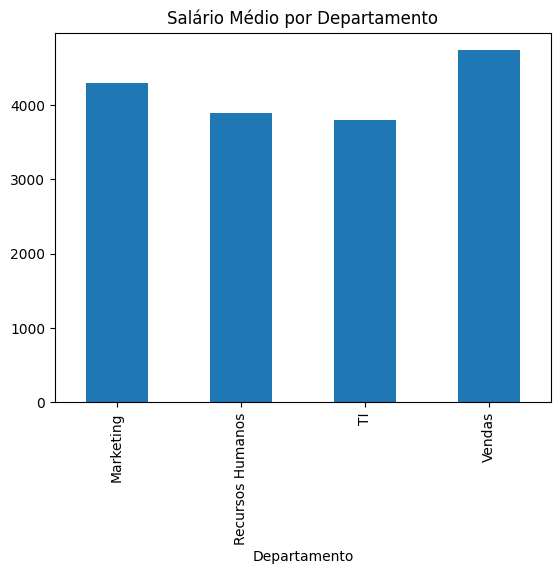

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras: salário médio por departamento
df.groupby('Departamento')['Salario'].mean().plot(kind='bar')
plt.title('Salário Médio por Departamento')
plt.show()

In [ ]:
# Adicionar uma coluna de bônus (5% do salário)
df['Bonus'] = df['Salario'] * 0.05
df.head()

,Nome,Idade,Cidade,Salario,Departamento,Bonus
0,Ana,25.0,São Paulo,4500.000000,Marketing,225.000000
1,João,30.0,Rio de Janeiro,4414.285714,Vendas,220.714286
2,Maria,22.0,Belo Horizonte,3800.000000,TI,190.000000
3,Carlos,35.0,São Paulo,5200.000000,Vendas,260.000000
4,Fernanda,28.0,Curitiba,4100.000000,Marketing,205.000000


In [ ]:
# Remover a coluna 'Bônus'
df.drop(columns=['Bonus'], inplace=True)

In [ ]:
df.head()

,Nome,Idade,Localização,Salario,Departamento
0,Ana,25.0,São Paulo,4500.000000,Marketing
1,João,30.0,Rio de Janeiro,4414.285714,Vendas
2,Maria,22.0,Belo Horizonte,3800.000000,TI
3,Carlos,35.0,São Paulo,5200.000000,Vendas
4,Fernanda,28.0,Curitiba,4100.000000,Marketing


In [ ]:
# Renomeando colunas
df.rename(columns={'Cidade' : 'Localização'}, inplace=True)
df.head()

,Nome,Idade,Localização,Salario,Departamento
0,Ana,25.0,São Paulo,4500.000000,Marketing
1,João,30.0,Rio de Janeiro,4414.285714,Vendas
2,Maria,22.0,Belo Horizonte,3800.000000,TI
3,Carlos,35.0,São Paulo,5200.000000,Vendas
4,Fernanda,28.0,Curitiba,4100.000000,Marketing


In [ ]:
# Listar cidade únicas
print(df['Localização'].unique())

['São Paulo' 'Rio de Janeiro' 'Belo Horizonte' 'Curitiba']


In [ ]:
# Contar funcionários por departamento
print(df['Departamento'].value_counts())

Departamento
Vendas              3
Marketing           2
TI                  1
Recursos Humanos    1
Name: count, dtype: int64


In [ ]:
# Ordenar por idade (do mais velho para o mais novo)
df.sort_values(by='Idade', ascending=False, inplace=True)
df.head()

,Nome,Idade,Localização,Salario,Departamento
3,Carlos,35.0,São Paulo,5200.000000,Vendas
6,Juliana,31.0,São Paulo,3900.000000,Recursos Humanos
1,João,30.0,Rio de Janeiro,4414.285714,Vendas
7,Lucas,29.0,Rio de Janeiro,4600.000000,Vendas
4,Fernanda,28.0,Curitiba,4100.000000,Marketing


In [ ]:
# Ordenar por cidade e salário
df.sort_values(by=['Localização', 'Salario'], inplace=True)
df.head()

,Nome,Idade,Localização,Salario,Departamento
2,Maria,22.0,Belo Horizonte,3800.000000,TI
4,Fernanda,28.0,Curitiba,4100.000000,Marketing
1,João,30.0,Rio de Janeiro,4414.285714,Vendas
7,Lucas,29.0,Rio de Janeiro,4600.000000,Vendas
6,Juliana,31.0,São Paulo,3900.000000,Recursos Humanos


In [ ]:
# Classificar faixa etária
df['Faixa_Etaria'] = df['Idade'].apply(
    lambda idade: 'Jovem' if idade < 30 else 'Adulto' if idade < 40 else 'Sênior'
)
df.head()

,Nome,Idade,Localização,Salario,Departamento,Faixa_Etaria
2,Maria,22.0,Belo Horizonte,3800.000000,TI,Jovem
4,Fernanda,28.0,Curitiba,4100.000000,Marketing,Jovem
1,João,30.0,Rio de Janeiro,4414.285714,Vendas,Adulto
7,Lucas,29.0,Rio de Janeiro,4600.000000,Vendas,Jovem
6,Juliana,31.0,São Paulo,3900.000000,Recursos Humanos,Adulto


In [ ]:
# Converter nomes para maiúsculas
df['Nome'] = df['Nome'].str.upper()
df.head()

,Nome,Idade,Localização,Salario,Departamento,Faixa_Etaria
2,MARIA,22.0,Belo Horizonte,3800.000000,TI,Jovem
4,FERNANDA,28.0,Curitiba,4100.000000,Marketing,Jovem
1,JOÃO,30.0,Rio de Janeiro,4414.285714,Vendas,Adulto
7,LUCAS,29.0,Rio de Janeiro,4600.000000,Vendas,Jovem
6,JULIANA,31.0,São Paulo,3900.000000,Recursos Humanos,Adulto


In [ ]:
# Verificar linhas duplicadas
print(df.duplicated().sum())

0


In [ ]:
# Remover duplicatas (se houver)
df.drop_duplicates(inplace=True)

In [ ]:
# Adicionar coluna de data para testes
df['Data_Contratacao'] = ['2020-01-15', '2018-05-22', '2021-11-30', '2017-03-10', '2019-07-05', '2022-02-28', '2020-09-12']
df.head()

,Nome,Idade,Localização,Salario,Departamento,Faixa_Etaria,Data_Contratacao
2,MARIA,22.0,Belo Horizonte,3800.000000,TI,Jovem,2020-01-15
4,FERNANDA,28.0,Curitiba,4100.000000,Marketing,Jovem,2018-05-22
1,JOÃO,30.0,Rio de Janeiro,4414.285714,Vendas,Adulto,2021-11-30
7,LUCAS,29.0,Rio de Janeiro,4600.000000,Vendas,Jovem,2017-03-10
6,JULIANA,31.0,São Paulo,3900.000000,Recursos Humanos,Adulto,2019-07-05


In [ ]:
# Converter para datetime
df['Data_Contratacao'] = pd.to_datetime(df['Data_Contratacao'])

In [ ]:
# Extrair ano de contratação
df['Ano_Contratacao'] = df['Data_Contratacao'].dt.year
df.head()

,Nome,Idade,Localização,Salario,Departamento,Faixa_Etaria,Data_Contratacao,Ano_Contratacao
2,MARIA,22.0,Belo Horizonte,3800.000000,TI,Jovem,2020-01-15,2020
4,FERNANDA,28.0,Curitiba,4100.000000,Marketing,Jovem,2018-05-22,2018
1,JOÃO,30.0,Rio de Janeiro,4414.285714,Vendas,Adulto,2021-11-30,2021
7,LUCAS,29.0,Rio de Janeiro,4600.000000,Vendas,Jovem,2017-03-10,2017
6,JULIANA,31.0,São Paulo,3900.000000,Recursos Humanos,Adulto,2019-07-05,2019


In [ ]:
# Criar um segundo DataFrame para combinar
df_departamentos = pd.DataFrame(
    {
        'Departamento': ['Marketing', 'Vendas', 'TI', 'Recursos Humanos'],
        'Orcamento': [100000, 150000, 200000, 80000]
    }
)

# Combinar com merge (join)
df_completo = df.merge(df_departamentos, on='Departamento', how='left')
df.head()

,Nome,Idade,Localização,Salario,Departamento,Faixa_Etaria,Data_Contratacao,Ano_Contratacao
2,MARIA,22.0,Belo Horizonte,3800.000000,TI,Jovem,2020-01-15,2020
4,FERNANDA,28.0,Curitiba,4100.000000,Marketing,Jovem,2018-05-22,2018
1,JOÃO,30.0,Rio de Janeiro,4414.285714,Vendas,Adulto,2021-11-30,2021
7,LUCAS,29.0,Rio de Janeiro,4600.000000,Vendas,Jovem,2017-03-10,2017
6,JULIANA,31.0,São Paulo,3900.000000,Recursos Humanos,Adulto,2019-07-05,2019


In [ ]:
# Filtar funcionários cujo nome começa com 'A'
df[df['Nome'].str.startswith('A')]

,Nome,Idade,Localização,Salario,Departamento,Faixa_Etaria,Data_Contratacao,Ano_Contratacao
0,ANA,25.0,São Paulo,4500.0,Marketing,Jovem,2022-02-28,2022


In [ ]:
# Extrair a primeira letra do nome
df['Inicial'] = df['Nome'].str[0]

In [ ]:
# Salário total do departamento de Marketing
salario_marketing = df[df['Departamento'] == 'Marketing']['Salario'].sum()
print(salario_marketing)

8600.0


In [4]:
# Média de idade de funcionários com salário > 4000
media_idade = df[df['Salario'] > 4000]['Idade'].mean()
print(media_idade)

29.25


In [6]:
# Média de salário por departamento e cidade
pivot = df.pivot_table(
    index = 'Departamento',
    columns = 'Cidade',
    values = 'Salario',
    aggfunc = 'mean'
)
print(pivot)

Cidade            Belo Horizonte  Curitiba  Rio de Janeiro  São Paulo
Departamento                                                         
Marketing                    NaN    4100.0             NaN     4500.0
Recursos Humanos             NaN       NaN             NaN     3900.0
TI                        4300.0       NaN             NaN        NaN
Vendas                       NaN       NaN          4600.0     5200.0


In [9]:
# Exportar para outros formatos
# Para Excel
df.to_excel('funcionarios.xlsx', index=False)

# Para JSON
df.to_json('funcionarios.json', orient='records')

In [13]:
# Criar coluna Status
df['Status'] = df['Salario'].apply(
    lambda salario: 'Baixo' if salario < 3000 else 'Médio' if salario < 4500 else 'Alto'
)
df.head()

,Nome,Idade,Cidade,Salario,Departamento,Status
0,Ana,25.0,São Paulo,4500.0,Marketing,Alto
1,João,30.0,Rio de Janeiro,NaN,Vendas,Alto
2,Maria,22.0,Belo Horizonte,3800.0,TI,Médio
3,Carlos,35.0,São Paulo,5200.0,Vendas,Alto
4,Fernanda,28.0,Curitiba,4100.0,Marketing,Médio
